# 0.1 Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

from IPython.core.display import HTML
from tabulate import tabulate

## 0.1.1 Loading datasets

In [2]:
df_eda = pd.read_csv('../data/interim/eda_data.csv')

## 0.1.2 Helper functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    # %pylab inline
    # plt.style.use( 'bmh' )
    plt.style.use( 'petroff10' )
    plt.rcParams['figure.figsize'] = [11, 5]
    plt.rcParams['font.size'] = 11
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )


In [4]:
jupyter_settings()

# 1.0 EDA

## 1.1. Univariate Analysis

In [5]:
df_eda.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,male,44,has_license,28,no,over_2_years,yes,40454.0,26,217,yes
1,2,male,76,has_license,3,no,1_to_2_years,no,33536.0,26,183,no
2,3,male,47,has_license,28,no,over_2_years,yes,38294.0,26,27,yes
3,4,male,21,has_license,11,yes,under_1_year,no,28619.0,152,203,no
4,5,female,29,has_license,41,yes,under_1_year,no,27496.0,152,39,no


In [6]:
num_var = df_eda.select_dtypes(include=['int64', 'float64'])
cat_var = df_eda.select_dtypes(exclude=['int64', 'float64'])

### 1.1.1 Target variable distribution

<Axes: xlabel='response', ylabel='Count'>

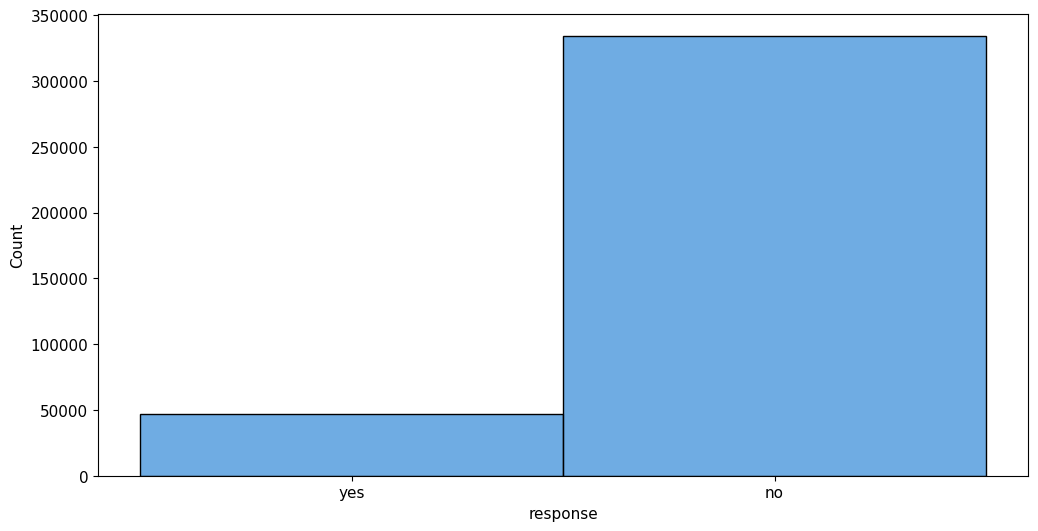

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(df_eda['response'])

### 1.1.2 Check distributions for numerical variables

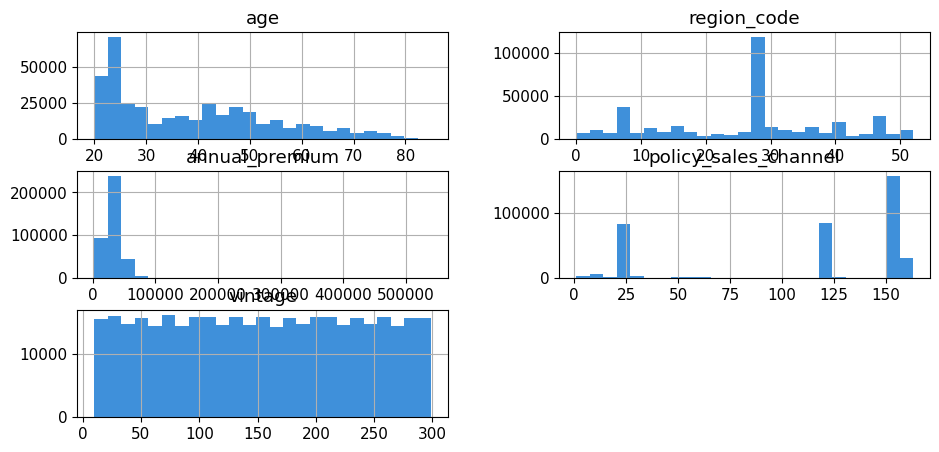

In [8]:
aux1 = num_var.drop(columns='id')
aux1.hist(bins=25)
plt.tight_layout
plt.show()

### 1.1.3 Check distributions for categorical variables

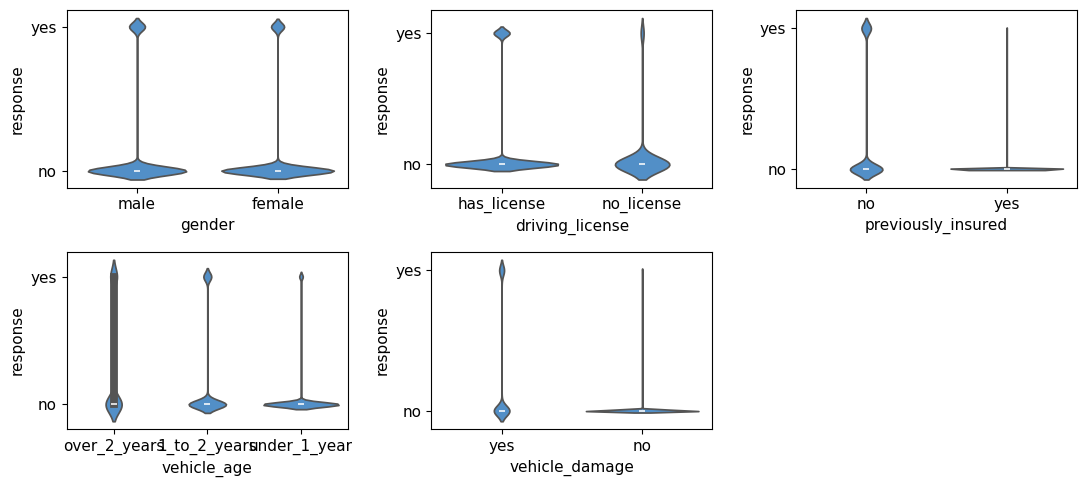

In [9]:
plt.subplot(2,3,1)
sns.violinplot(x='gender', y='response', data=cat_var)

plt.subplot(2,3,2)
sns.violinplot(x='driving_license', y='response', data=cat_var)

plt.subplot(2,3,3)
sns.violinplot(x='previously_insured', y='response', data=cat_var)

plt.subplot(2,3,4)
sns.violinplot(x='vehicle_age', y='response', data=cat_var)

plt.subplot(2,3,5)
sns.violinplot(x='vehicle_damage', y='response', data=cat_var)

plt.tight_layout()

As a result, we can notice that the distribution of the categorical features express a heavily imbalanced dataset. The majority class seems to be those with the no reponse. We actually already verify and quantify this effect extensively on the wrangling notebook. 

--- 

## 1.2 Hypothesis validation (Bivariate Analysis)

### <b>Hypothesis list:</b>

<b>[HIPÓTESE 1] (gender)</b>:

* O gênero do cliente não influencia muito a taxa de aceitação do produto.

<b>[HIPÓTESE 2] (age)</b>:

* Clientes mais velhos tendem a aceitar mais o seguro de carro.

<b>[HIPÓTESE 3] (driving_license)</b>:

* Espera-se uma resposta negativa da maioria dos clientes sem carteira de motorista.

<b>[HIPÓTESE 4] (region_code)</b>:

* Clientes em certas regiões tendem a aceitar mais (essa hipótese pode precisar de informações adicionais como um indicativo de periculosidade)

<b>[HIPÓTESE 5] (previously_insured)</b>:

* É esperado  que clientes que já obtiveram algum seguro tenham maior propensão à aceitar o novo produto.

<b>[HIPÓTESES 6 e 7] (vehicle_age)</b>:

* Clientes com carros muito novos (< 1 ano) tendem a aceitar o seguro de carro.
* Clientes com carros muito velhos (> 2 anos) tendem a aceitar o seguro de carro.

<b>[HIPÓTESE 8] (vehicle_damage)</b>:

* Espera-se que clientes que já tiveram algum acidente com carro aceitem mais o seguro.

<b>[HIPÓTESE 9 e 10] (annual_premium)</b>:

* Espera-se que clientes com maior renda tenham maior probabilidade de aceitar a oferta.
* Também é esperado que esta variável tenha um impacto considerável na distribuição da resposta.

<b>[HIPÓTESE 11] (policy_sales_channel)</b>:

* Não é esperado que haja um impacto significativo nas respostas. Porém, é possível que exista um canal preferencial na amostra de novos clientes.
* Pode-se investigar os canais mais populares e verificar que tipo de abordagem gera o sucesso em respostas positivas (insight).

<b>[HIPÓTESE 12] (vintage)</b>:

* É esperado que clientes de longa data (maior vintage) tenham mais probabilidade de aceitar a oferta.


---

### <b>[HIPÓTESE 1] (gender)</b>:

1) O gênero do cliente não influencia muito a taxa de aceitação do produto. <b><span style="color: green;">[TRUE]</span></b>

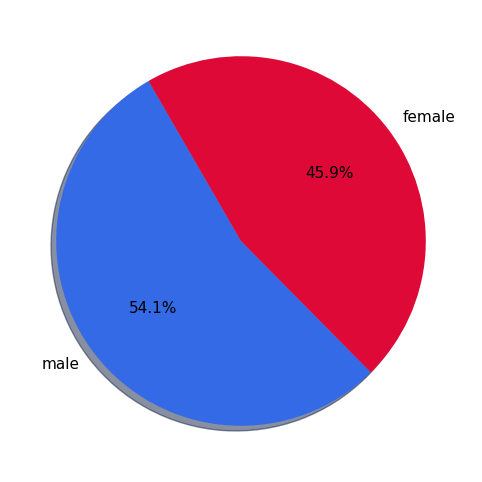

In [10]:
# Gender Representation
plt.figure(figsize=(9, 6))
plt.pie(df_eda['gender'].value_counts(), labels=['male', 'female'], autopct='%1.1f%%', shadow=True, startangle=120, colors=["#356ae6", "#de0937"])
plt.show()

### <b>[HIPÓTESE 2] (age)</b>:

1) Clientes mais velhos tendem a aceitar mais o seguro de carro. <b><span style="color: green;">[TRUE]</span></b>

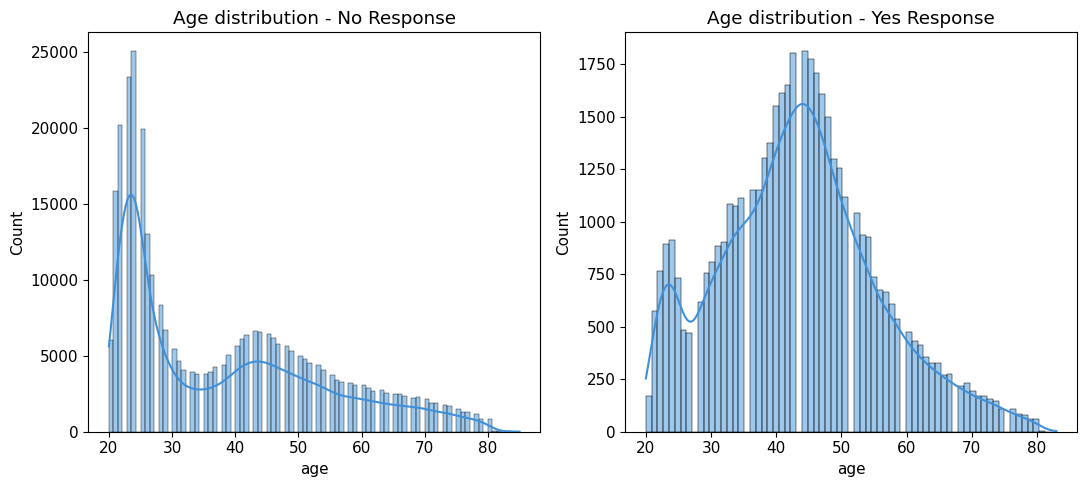

In [11]:
# age hist
df_aux1 = df_eda.loc[df_eda['response'] == 'no',:]
df_aux2 = df_eda.loc[df_eda['response'] == 'yes',:]

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.title('Age distribution - No Response')
sns.histplot(df_aux1['age'], kde=True)

plt.subplot(1,2,2)
plt.title('Age distribution - Yes Response')
sns.histplot(df_aux2['age'], kde=True)

plt.tight_layout()


<Axes: title={'center': 'Age distribution by Response'}, xlabel='response', ylabel='age'>

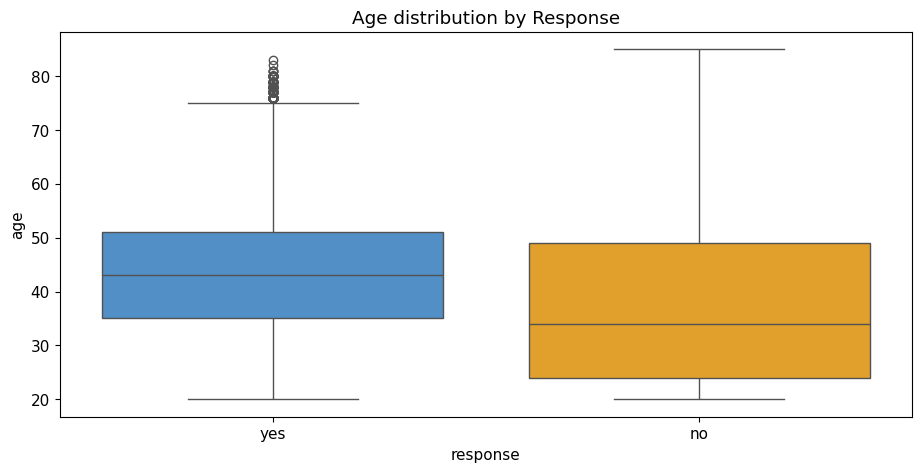

In [12]:
# age boxplot
plt.figure(figsize=(11,5))
plt.title('Age distribution by Response')
sns.boxplot(x='response', y='age', hue='response' ,data=df_eda)

### <b>[HIPÓTESE 3] (driving_license)</b>:

1) Espera-se uma resposta negativa da maioria dos clientes sem carteira de motorista. <b><span style="color: blue;"><b>[INCONCLUSIVE]</b></span>

In [13]:
# driving_license
df_aux3 = df_eda.loc[df_eda['driving_license'] == 'has_license',['driving_license', 'response']].groupby(['response']).count().reset_index()
df_aux3

,response,driving_license
0,no,333628
1,yes,46669


Text(0.5, 1.0, 'Percentage of Customers with Driving License by Response')

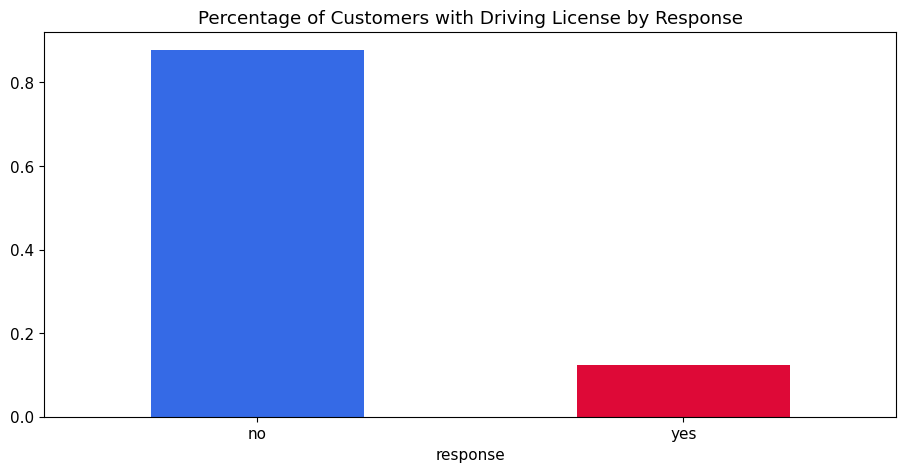

In [14]:
df_aux3['percentage'] = df_aux3['driving_license'] / df_aux3['driving_license'].sum()
df_aux3.plot(kind='bar', x='response', y='percentage', legend=False, color=['#356ae6', '#de0937'])
plt.xticks(rotation=360)
plt.title('Percentage of Customers with Driving License by Response')

<b>NOTE:</b> As the data has not yet been treated for class imbalance, the disparity showed above may simply reflect a misrepresentation of the minority class. However, clients without driving license are also expected to show negative responses more frequently. 

### <b>[HIPÓTESE 4] (region_code)</b>:

1) Clientes em certas regiões tendem a aceitar mais (essa hipótese pode precisar de informações adicionais). <b><span style="color: red;">[FALSE]</span></b>

<Axes: xlabel='region_code', ylabel='id'>

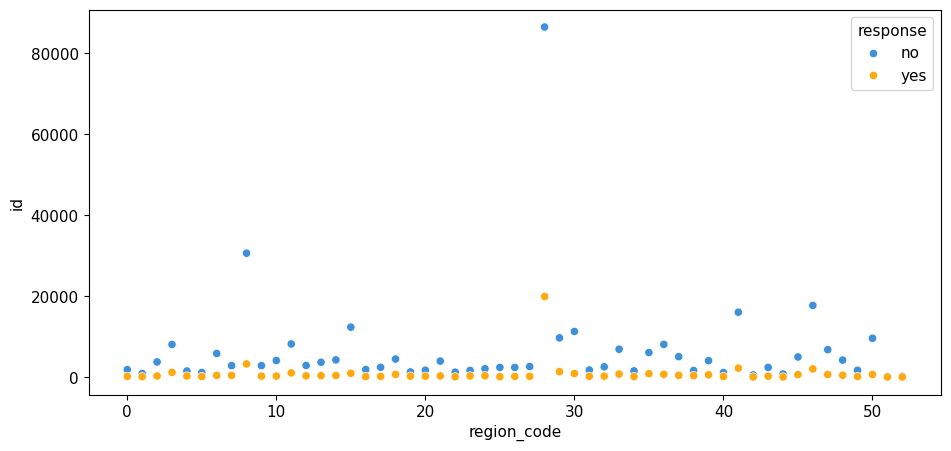

In [15]:
# region_code
df_aux = df_eda[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(data=df_aux, x= 'region_code', y='id', hue='response')

<Axes: xlabel='region_code', ylabel='id'>

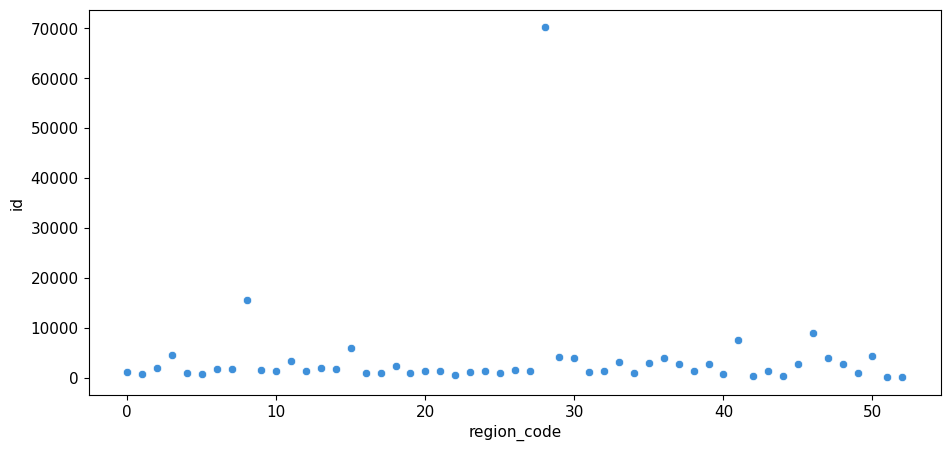

In [16]:
df_aux1 = df_eda[df_eda['vehicle_damage'] == 'yes']
df_aux2 = df_aux1[['id', 'region_code']].groupby(['region_code']).count().reset_index()
sns.scatterplot(data=df_aux2, x='region_code', y='id')

### <b>[HIPÓTESE 5] (previously_insured)</b>:

1) É esperado  que clientes que já obtiveram algum seguro tenham maior propensão à aceitar o novo produto. <b><span style="color: red;">[FALSE]</span></b>

<Axes: xlabel='previously_insured', ylabel='Count'>

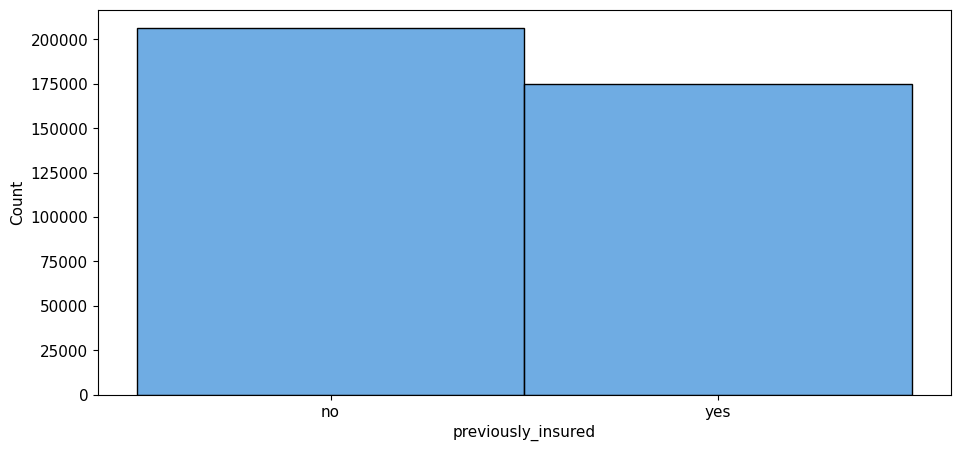

In [17]:
# previously_insured
sns.histplot(df_eda['previously_insured'])

<Axes: xlabel='previously_insured', ylabel='id'>

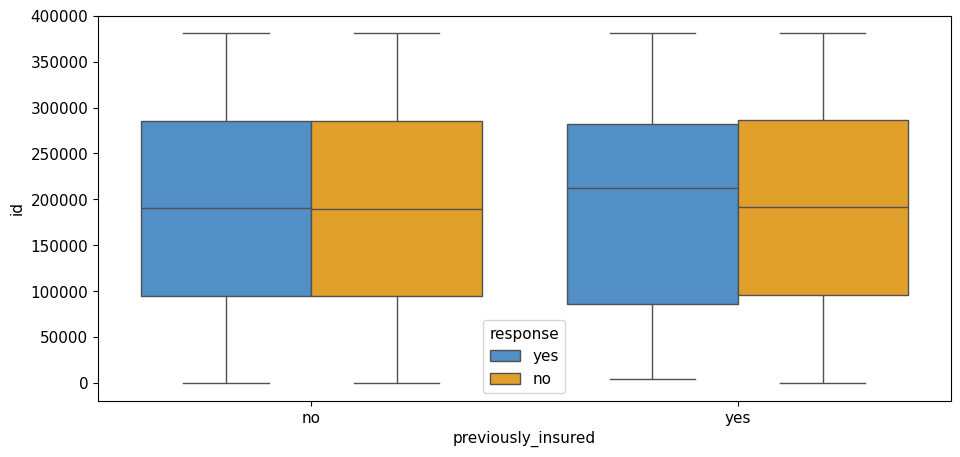

In [18]:
sns.boxplot(data=df_eda, x='previously_insured', y='id', hue='response')

In [19]:
pd.crosstab(df_eda['previously_insured'], df_eda['response']).apply(lambda x: x / x.sum(), axis= 1)

response,no,yes
previously_insured,,
no,0.774546,0.225454
yes,0.999095,0.000905


### <b>[HIPÓTESES 6 e 7] (vehicle_age)</b>:

6) Clientes com carros muito novos (< 1 ano) tendem a aceitar o seguro de carro. <b><span style="color: green;">[TRUE]</span></b>
7) Clientes com carros muito velhos (> 2 anos) tendem a aceitar o seguro de carro. <b><span style="color: red;">[FALSE]</span></b>

In [20]:
# vehicle_age proportion
df_eda[['vehicle_age', 'response']].value_counts(normalize=True, sort=False).reset_index()

,vehicle_age,response,proportion
0,1_to_2_years,no,0.434285
1,1_to_2_years,yes,0.091328
2,over_2_years,no,0.029663
3,over_2_years,yes,0.012338
4,under_1_year,no,0.413488
5,under_1_year,yes,0.018897


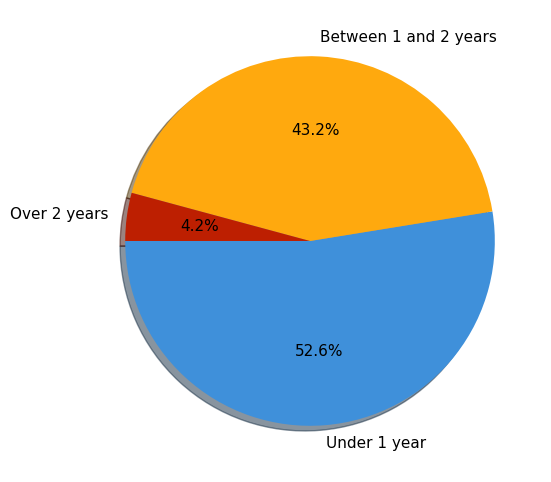

In [21]:
# Vehicle Representation
plt.figure(figsize=(9, 6))
plt.pie(df_eda['vehicle_age'].value_counts(), labels=['Under 1 year', 'Between 1 and 2 years', 'Over 2 years'], autopct='%1.1f%%',shadow=True, startangle=180)
plt.show()

### <b>[HIPÓTESES 8] (vehicle_damage)</b>:

1) Espera-se que clientes que já tiveram algum acidente com carro aceitem mais o seguro. <b><span style="color: red;">[FALSE]</span></b>

<Axes: xlabel='vehicle_damage', ylabel='id'>

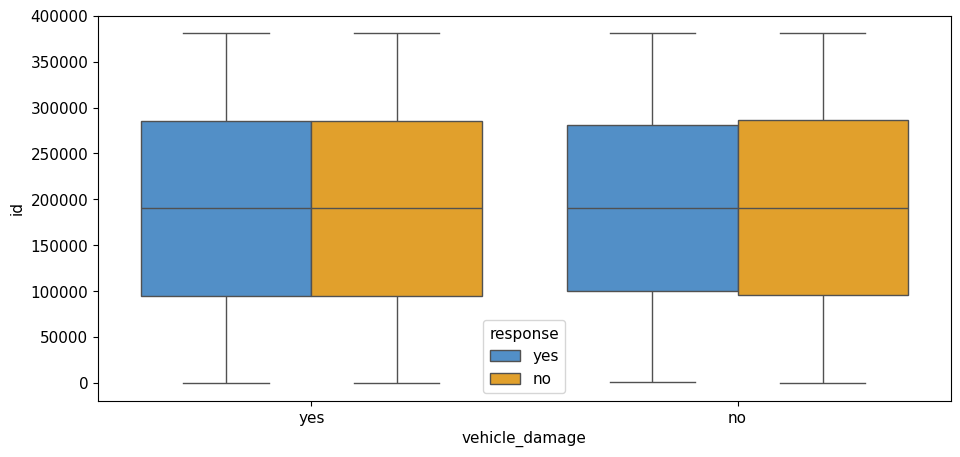

In [22]:
sns.boxplot(data=df_eda, x='vehicle_damage', y='id', hue='response')

### <b>[HIPÓTESE 9 e 10] (annual_premium)</b>:

9) Espera-se que clientes com maior renda tenham maior probabilidade de aceitar a oferta. <b><span style="color: green;">[TRUE]</span></b>
10) Também é esperado que esta variável tenha um impacto considerável na distribuição da resposta. <b><span style="color: red;">[FALSE]</span></b>

<Axes: xlabel='response', ylabel='annual_premium'>

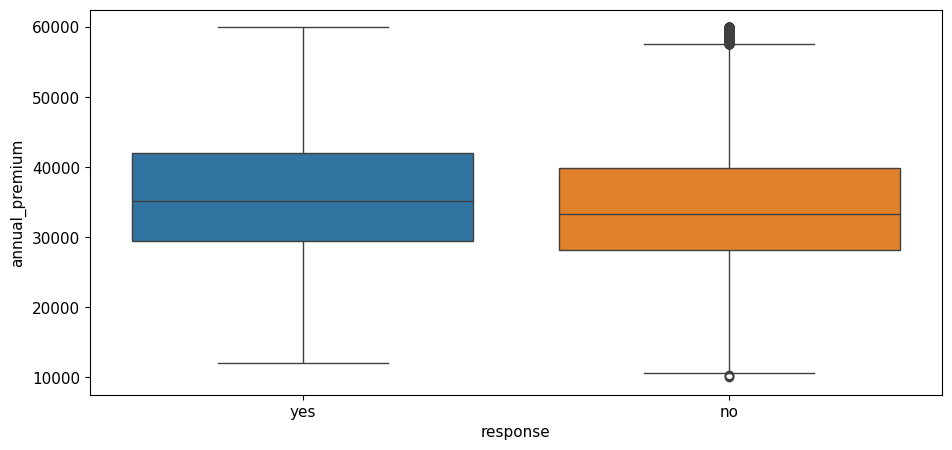

In [23]:
# annual_premium
df_aux = df_eda[(df_eda['annual_premium'] < 60000) & (df_eda['annual_premium'] > 10000)]
sns.boxplot(x='response', y='annual_premium', data=df_aux, palette='tab10',hue='response', legend=False)

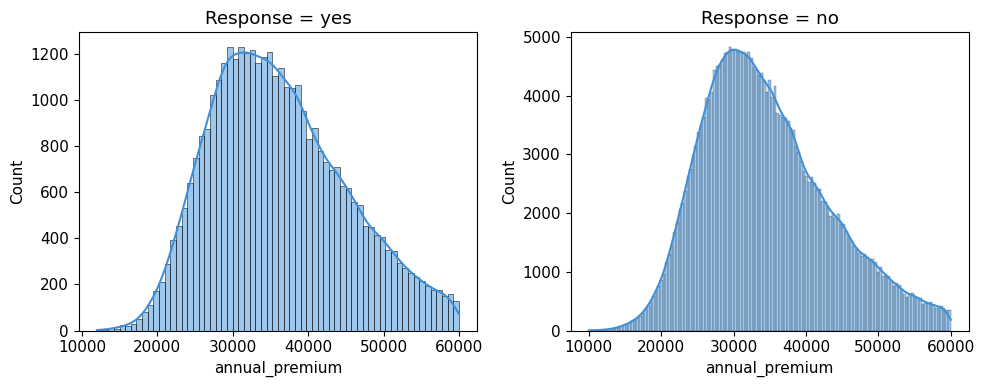

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Response = yes')
df_aux2 = df_aux.loc[df_aux['response'] == 'yes', 'annual_premium']
sns.histplot(df_aux2, kde=True)

plt.subplot(1,2,2)
plt.title('Response = no')
df_aux2 = df_aux.loc[df_aux['response'] == 'no', 'annual_premium']
sns.histplot(df_aux2, kde=True)

plt.tight_layout()

NOTA: Por mais que o gráfico de caixas tenha uma quantidade considerável de outlier nas respostas negativa. Devemos sempre relembrar a possibilidade de este efeito ser causado pela falta de balanceamento do dataset.

### <b>[HIPÓTESES 11] (policy_sales_channel)</b>:

1) Não é esperado que haja um impacto significativo nas respostas. Porém, é possível que exista um canal preferencial na amostra de novos clientes. <b><span style="color: green;">[TRUE]</span></b>
2) Pode-se investigar os canais mais populares e verificar que tipo de abordagem gera maior sucesso (insight).

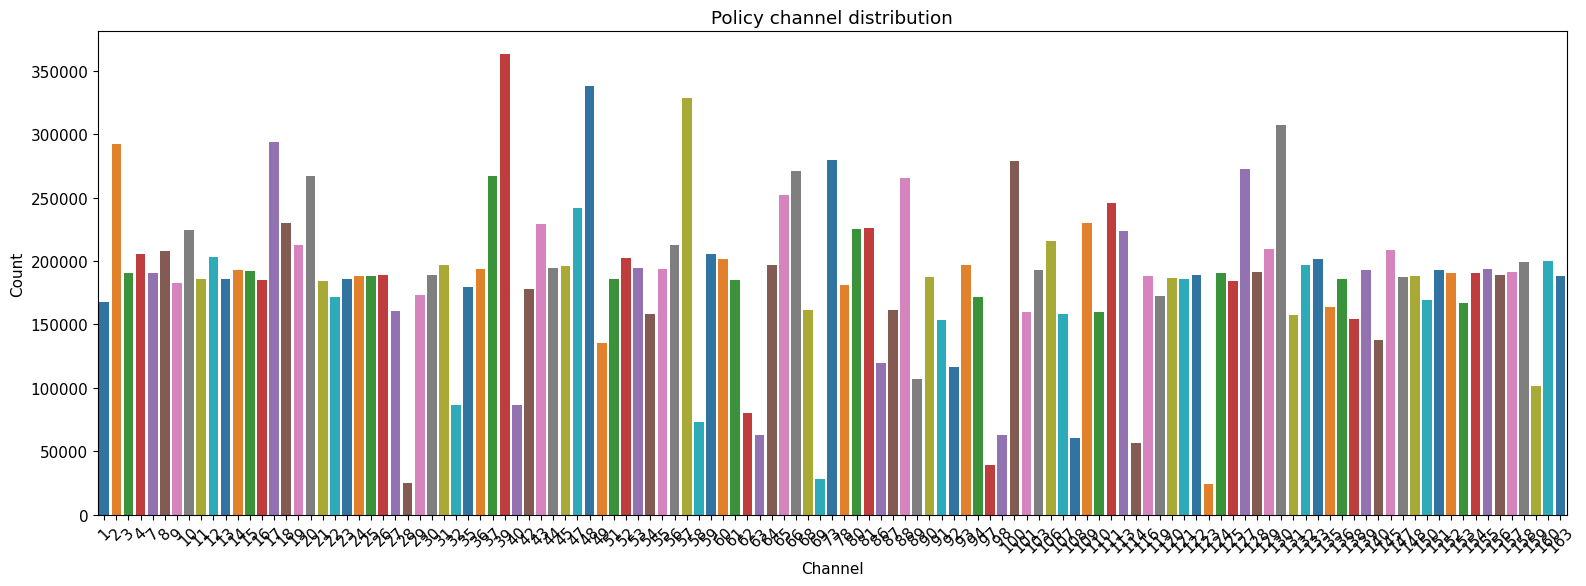

In [25]:
# policy_sales_channel

df_aux1 = df_eda[df_eda['response'] == 'yes']

plt.figure(figsize=(16,6))
sns.barplot(x='policy_sales_channel', y='id', data=df_aux1, palette='tab10', hue='policy_sales_channel', legend=False, errorbar=None);
plt.title('Policy channel distribution')
plt.tick_params(axis='x', labelrotation= 45)
plt.xlabel('Channel')
plt.ylabel('Count')
plt.tight_layout()

In [26]:
# Top 10 most sucessful sales channel
df_aux1 = df_eda.loc[df_eda['response'] == 'yes',:]
df_aux2 = df_aux1.loc[:,['policy_sales_channel', 'response']].groupby('policy_sales_channel').count().sort_values(by='response', ascending=False).reset_index().head(10)
df_aux2

,policy_sales_channel,response
0,26,15891
1,124,13996
2,152,3858
3,156,2297
4,157,1794
5,122,1720
6,154,1474
7,163,880
8,160,475
9,155,395


Text(0, 0.5, 'response count')

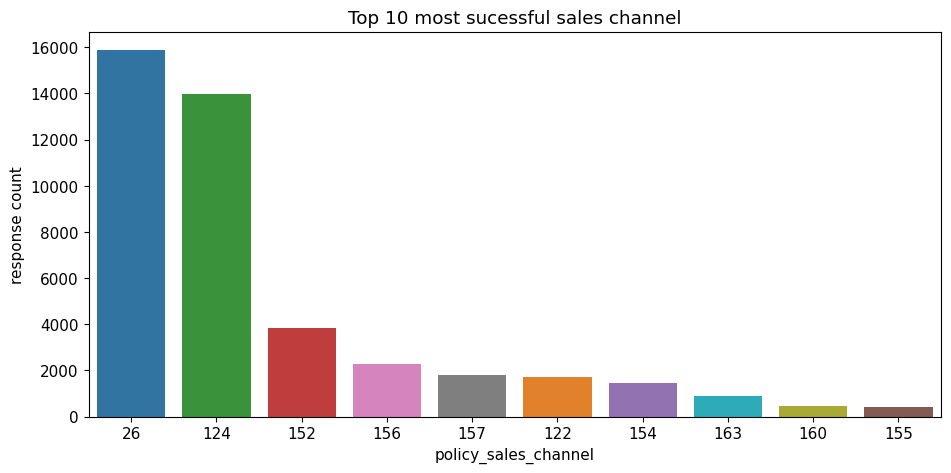

In [27]:
sns.barplot(data=df_aux2,x='policy_sales_channel', y='response', order=df_aux2['policy_sales_channel'], palette='tab10', hue='policy_sales_channel', legend=False)
plt.title('Top 10 most sucessful sales channel')
plt.ylabel('response count')

### <b>[HIPÓTESE 12] (vintage)</b>:

1) É esperado que clientes de longa data (maior vintage) tenham mais probabilidade de aceitar a oferta. <b><span style="color: red;">[FALSE]</span></b>

In [28]:
# Min max fidelity time of clients
print(f'Max years as client: {df_eda["vintage"].max()} years \nMin years as client: {df_eda["vintage"].min()} years')

Max years as client: 299 years 
Min years as client: 10 years


<Axes: xlabel='response', ylabel='vintage'>

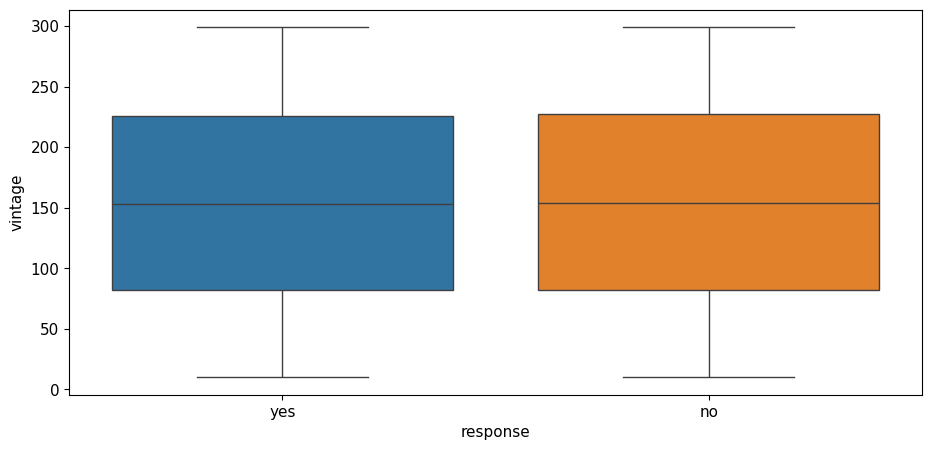

In [29]:
# vintage distribution
sns.boxplot(x='response', y='vintage', data=df_aux, palette='tab10',hue='response', legend=False)

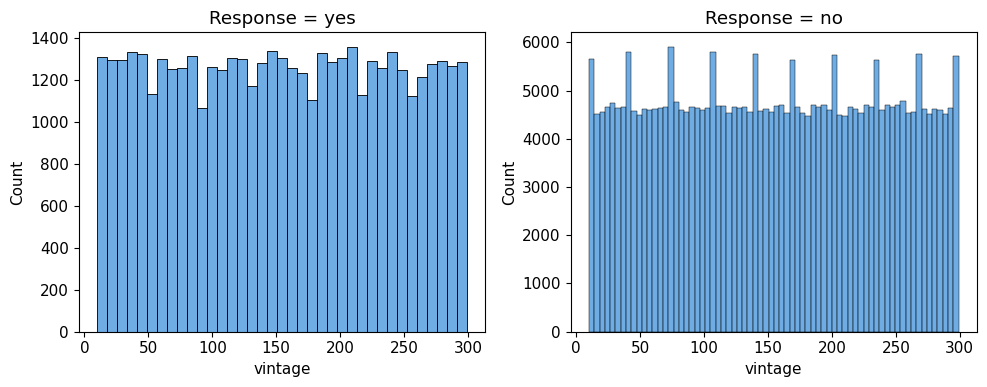

In [30]:
# vintage by response
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Response = yes')
df_aux2 = df_eda.loc[df_eda['response'] == 'yes', 'vintage']
sns.histplot(df_aux2)

plt.subplot(1,2,2)
plt.title('Response = no')
df_aux2 = df_eda.loc[df_eda['response'] == 'no', 'vintage']
sns.histplot(df_aux2)

plt.tight_layout()

### <b> Results </b>:

In [6]:
results = [{"Hypothesis": "Hypothesis 1", "Validation": "True"},
           {"Hypothesis": "Hypothesis 2", "Validation": "True"},
           {"Hypothesis": "Hypothesis 3", "Validation": "Inconclusive"},
           {"Hypothesis": "Hypothesis 4", "Validation": "False"},
           {"Hypothesis": "Hypothesis 5", "Validation": "False"},
           {"Hypothesis": "Hypothesis 6", "Validation": "True"},
           {"Hypothesis": "Hypothesis 7", "Validation": "False"},
           {"Hypothesis": "Hypothesis 8", "Validation": "False"},
           {"Hypothesis": "Hypothesis 9", "Validation": "True"},
           {"Hypothesis": "Hypothesis 10", "Validation": "False"},
           {"Hypothesis": "Hypothesis 11", "Validation": "True"},
           {"Hypothesis": "Hypothesis 12", "Validation": "False"}]

In [7]:
table = tabulate(results, headers="keys", tablefmt="pipe")

print(table)

| Hypothesis    | Validation   |
|:--------------|:-------------|
| Hypothesis 1  | True         |
| Hypothesis 2  | True         |
| Hypothesis 3  | Inconclusive |
| Hypothesis 4  | False        |
| Hypothesis 5  | False        |
| Hypothesis 6  | True         |
| Hypothesis 7  | False        |
| Hypothesis 8  | False        |
| Hypothesis 9  | True         |
| Hypothesis 10 | False        |
| Hypothesis 11 | True         |
| Hypothesis 12 | False        |


## 1.3 Multivariate Analysis

For this analysis will be using the dataset after the encoding process, so we can see more columns correlations.

In [66]:
encoded_df = pd.read_csv("../data/processed/train.csv")

In [ ]:
test_df = encoded_df.drop("response", axis=1)
corr = test_df.corr()

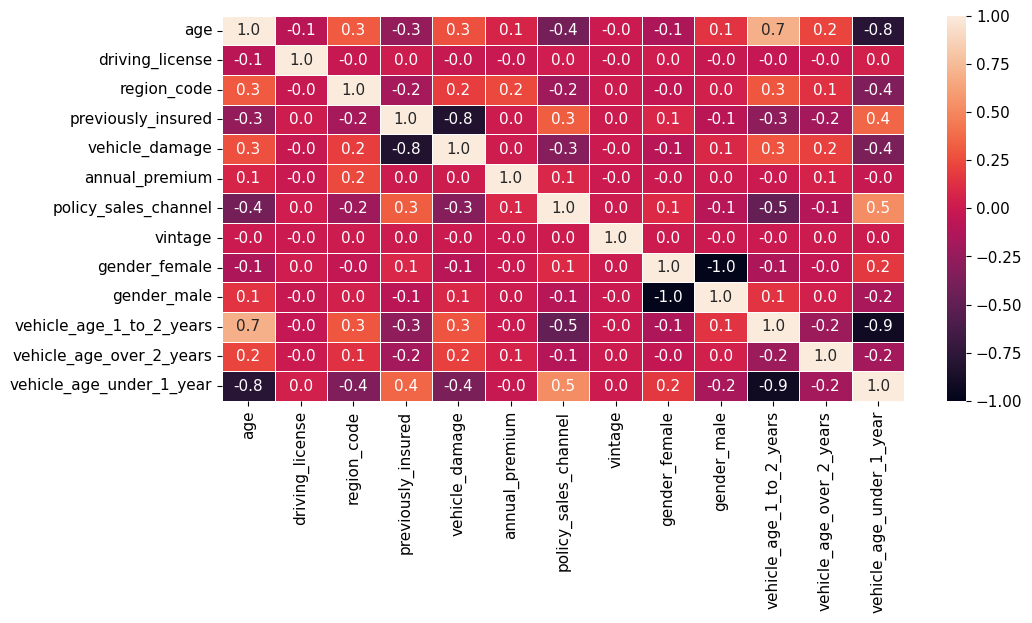

In [71]:
sns.heatmap(corr, annot=True,fmt=".1f", linewidths=.5, cmap="rocket", center=0);